## Performance of CNN models with Fashion MNSIT models

## LENET WITH FMNSIT

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json


# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the LeNet model architecture
def LeNet():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2), ),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = LeNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


# Save the model
model.save('lenet_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


import json
with open('lenet_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6155 - loss: 1.0677 - val_accuracy: 0.7970 - val_loss: 0.5601
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8004 - loss: 0.5329 - val_accuracy: 0.8221 - val_loss: 0.4776
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8340 - loss: 0.4572 - val_accuracy: 0.8402 - val_loss: 0.4450
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8467 - loss: 0.4203 - val_accuracy: 0.8422 - val_loss: 0.4260
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8570 - loss: 0.3890 - val_accuracy: 0.8615 - val_loss: 0.3857
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8675 - loss: 0.3659 - val_accuracy: 0.8667 - val_loss: 0.3728
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8755 - loss: 0.3457 - val_accuracy: 0.8721 - val_loss: 0.3574
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8766 - loss: 0.3341 - val_accuracy: 0.

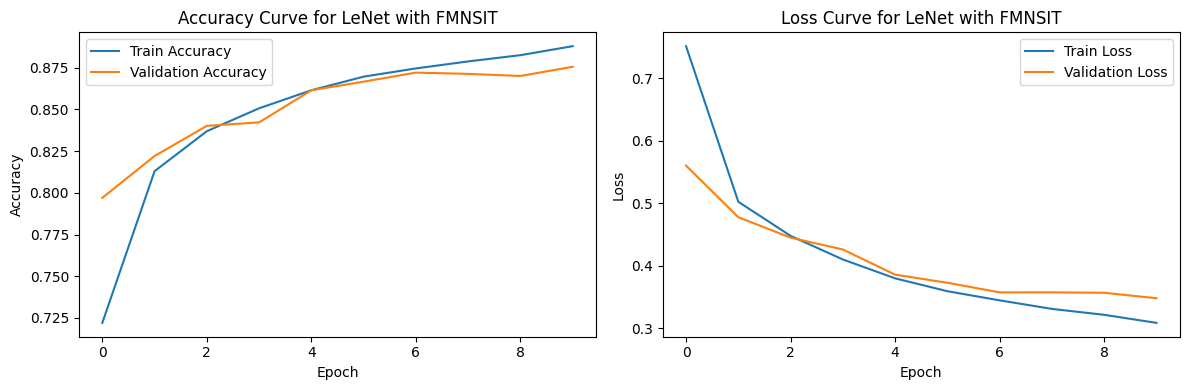

In [2]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for LeNet with FMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for LeNet with FMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Googlenet WITH FMNSIT

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    
    branch3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(branch3x3)
    
    branch5x5 = Conv2D(filters[2], (1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(branch5x5)
    
    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(branch_pool)
    
    # Concatenate all the branches along the depth axis
    return concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)

# Define the GoogLeNet model
def googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = AveragePooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # First Inception module
    x = inception_module(x, filters=(32, 64, 16, 16))
    
    # Second Inception module
    x = inception_module(x, filters=(64, 128, 32, 32))

    # Global Average Pooling
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs, output)

    return model

# Instantiate the GoogLeNet model
model = googlenet(input_shape=(28, 28, 1), num_classes=10)

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


# Save the model
model.save('googlenet_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


import json
with open('googlenet_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.3642 - loss: 1.6313 - val_accuracy: 0.7122 - val_loss: 0.7414
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.7040 - loss: 0.7835 - val_accuracy: 0.7624 - val_loss: 0.6598
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.7507 - loss: 0.6650 - val_accuracy: 0.7991 - val_loss: 0.5258
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.7913 - loss: 0.5764 - val_accuracy: 0.8123 - val_loss: 0.4933
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.8140 - loss: 0.5201 - val_accuracy: 0.8388 - val_loss: 0.4366
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.8276 - loss: 0.4854 - val_accuracy: 0.8572 - val_loss: 0.3911
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.8428 - loss: 0.4441 - val_accuracy: 0.8572 - val_loss: 0.3808
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.8569 - loss: 0.4076 - 

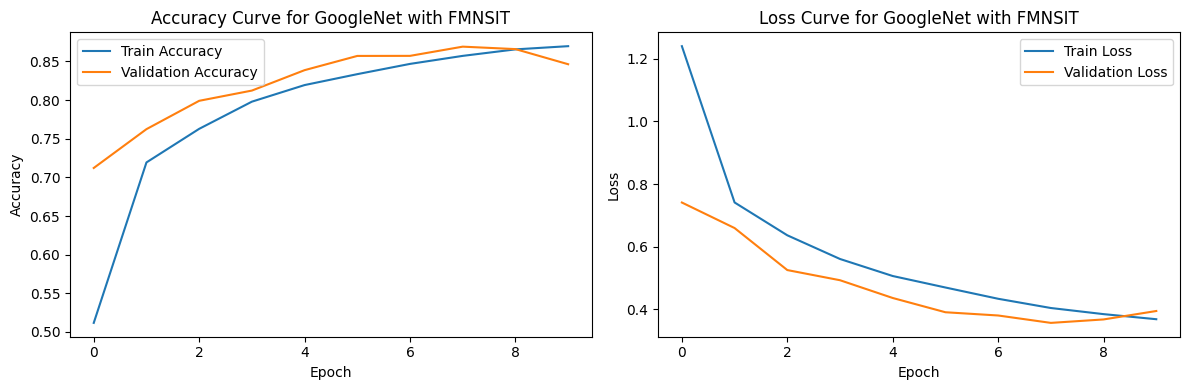

In [4]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for GoogleNet with FMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for GoogleNet with FMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# REsnet with FMNSIT

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the ResNet model architecture
def resnet_block(input_tensor, filters, kernel_size=3, stride=1):
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1:
        input_tensor = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(input_tensor)
        input_tensor = BatchNormalization()(input_tensor)

    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = resnet_block(x, 32)
    x = resnet_block(x, 32)
    x = resnet_block(x, 64, stride=2)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model

# Compile the model
model = ResNet(input_shape=(28, 28, 1), num_classes=10)
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('resnet_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


import json
with open('resnet_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 275s 706ms/step - accuracy: 0.6969 - loss: 1.4295 - val_accuracy: 0.6022 - val_loss: 1.4066
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 286s 762ms/step - accuracy: 0.8977 - loss: 0.2757 - val_accuracy: 0.9038 - val_loss: 0.2594
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 277s 739ms/step - accuracy: 0.9168 - loss: 0.2310 - val_accuracy: 0.9049 - val_loss: 0.2718
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 302s 805ms/step - accuracy: 0.9342 - loss: 0.1785 - val_accuracy: 0.9218 - val_loss: 0.2154
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 299s 798ms/step - accuracy: 0.9470 - loss: 0.1452 - val_accuracy: 0.9184 - val_loss: 0.2317
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 301s 804ms/step - accuracy: 0.9544 - loss: 0.1249 - val_accuracy: 0.9232 - val_loss: 0.2147
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 309s 824ms/step - accuracy: 0.9652 - loss: 0.0996 - val_accuracy: 0.9236 - val_loss: 0.2272
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 315s 805ms/step - accuracy: 0.9705 -

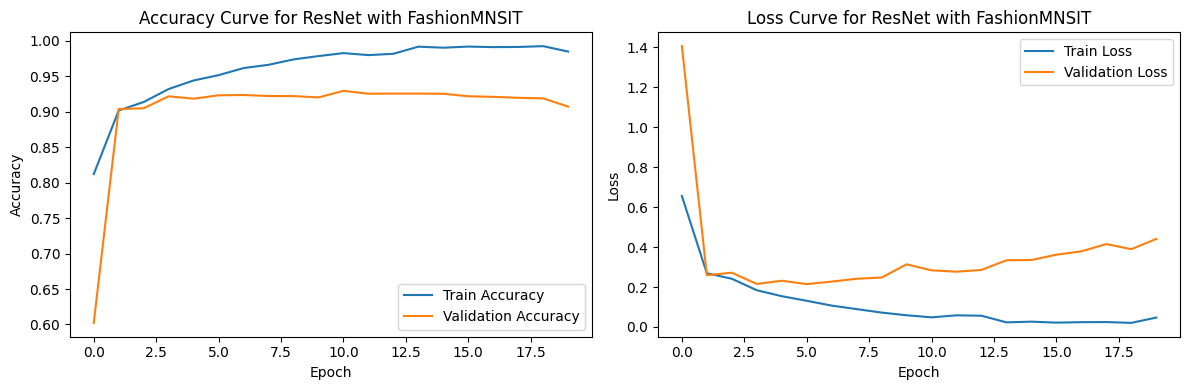

In [6]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for ResNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for ResNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

## Xceptionnet withFMNSIT

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Input, SeparableConv2D, MaxPooling2D, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Convert grayscale images to RGB (3 channels)
train_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(train_images))
test_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_images))

# Resize images to the input size required by Xception (71x71)
train_images = tf.image.resize(train_images, [71, 71])
test_images = tf.image.resize(test_images, [71, 71])


#Define xception block
def xception_block(x, filters, strides=(1, 1), shortcut_connection=True):
    residual = x

    # Separable Conv 1
    x = SeparableConv2D(filters, (3, 3), padding='same', strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Separable Conv 2
    x = SeparableConv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if shortcut_connection:
        # Adjust residual path to match dimensions if necessary
        if strides != (1, 1) or residual.shape[-1] != filters:
            residual = Conv2D(filters, (1, 1), strides=strides, padding='same')(residual)
            residual = BatchNormalization()(residual)
        x = Add()([x, residual])  # Add the residual connection
    x = Activation('relu')(x)

    return x


# Define the Xception CNN model
def xception_cnn(input_shape=(71, 71, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # MaxPooling Layer
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Xception Blocks
    x = xception_block(x, filters=64, shortcut_connection=False)
    x = xception_block(x, filters=128, strides=(2, 2))
    x = xception_block(x, filters=256, strides=(2, 2))
    x = xception_block(x, filters=728, strides=(2, 2))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs, output)

    return model


# Instantiate the Xception CNN model
model = xception_cnn(input_shape=(71, 71, 3), num_classes=10)

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('xceptionnet_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


import json
with open('xception_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 176s 410ms/step - accuracy: 0.6215 - loss: 1.0718 - val_accuracy: 0.0957 - val_loss: 2.7186
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 376ms/step - accuracy: 0.8636 - loss: 0.4201 - val_accuracy: 0.8813 - val_loss: 0.3239
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 379ms/step - accuracy: 0.8906 - loss: 0.3321 - val_accuracy: 0.8543 - val_loss: 0.4393
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 361ms/step - accuracy: 0.9008 - loss: 0.2972 - val_accuracy: 0.8966 - val_loss: 0.3000
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 361ms/step - accuracy: 0.9112 - loss: 0.2615 - val_accuracy: 0.8953 - val_loss: 0.3468
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 124s 329ms/step - accuracy: 0.9200 - loss: 0.2432 - val_accuracy: 0.8232 - val_loss: 0.5336
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 126s 336ms/step - accuracy: 0.9234 - loss: 0.2270 - val_accuracy: 0.9090 - val_loss: 0.2644
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 123s 329ms/step - accuracy: 0.9330 -

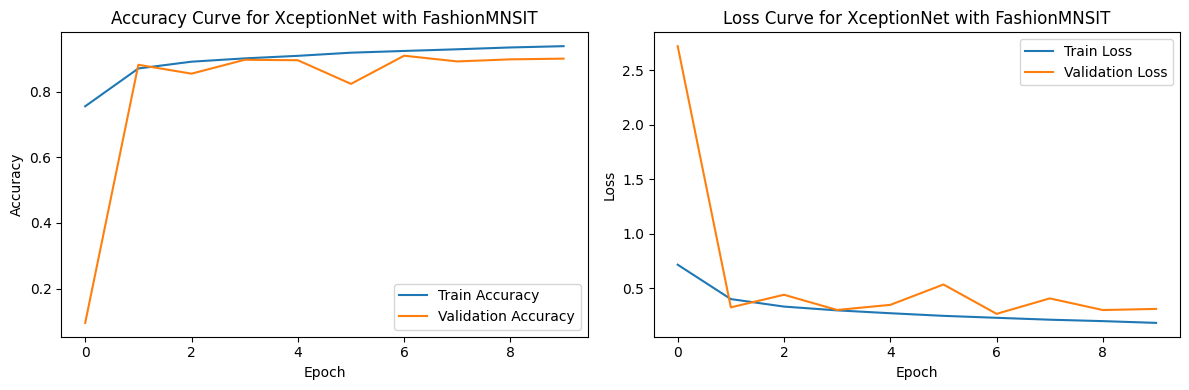

In [9]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for XceptionNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for XceptionNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## SENET CNN with Fashion MNSIT 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Input, SeparableConv2D, MaxPooling2D, BatchNormalization, Activation, Add, Reshape, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Convert grayscale images to RGB (3 channels)
train_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(train_images))
test_images = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_images))

# Resize images to a larger size for better model flexibility
train_images = tf.image.resize(train_images, [71, 71])
test_images = tf.image.resize(test_images, [71, 71])

# Define the Squeeze-and-Excitation block
def se_block(input_tensor, reduction_ratio=16):
    filters = input_tensor.shape[-1]  # Number of channels
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // reduction_ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape([1, 1, filters])(se)
    return Multiply()([input_tensor, se])

# Define a basic convolutional block with an SE block
def senet_block(x, filters, strides=(1, 1), shortcut_connection=True):
    residual = x

    # Convolutional layers
    x = Conv2D(filters, (3, 3), padding='same', strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Squeeze-and-Excitation
    x = se_block(x)

    # Shortcut connection
    if shortcut_connection:
        if strides != (1, 1) or residual.shape[-1] != filters:
            residual = Conv2D(filters, (1, 1), strides=strides, padding='same')(residual)
            residual = BatchNormalization()(residual)
        x = Add()([x, residual])
    x = Activation('relu')(x)

    return x

# Define the SENet CNN model
def senet_cnn(input_shape=(71, 71, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # MaxPooling Layer
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # SENet Blocks
    x = senet_block(x, filters=64, shortcut_connection=False)
    x = senet_block(x, filters=128, strides=(2, 2))
    x = senet_block(x, filters=256, strides=(2, 2))
    x = senet_block(x, filters=512, strides=(2, 2))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs, output)

    return model

# Instantiate the SENet CNN model
model = senet_cnn(input_shape=(71, 71, 3), num_classes=10)

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('senet_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


import json
with open('senet_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 358s 918ms/step - accuracy: 0.6892 - loss: 0.9018 - val_accuracy: 0.1798 - val_loss: 6.7651
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 330s 879ms/step - accuracy: 0.8825 - loss: 0.3624 - val_accuracy: 0.8856 - val_loss: 0.3195
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 306s 815ms/step - accuracy: 0.9007 - loss: 0.3005 - val_accuracy: 0.8970 - val_loss: 0.2836
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 300s 799ms/step - accuracy: 0.9131 - loss: 0.2633 - val_accuracy: 0.8997 - val_loss: 0.2782
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 303s 809ms/step - accuracy: 0.9207 - loss: 0.2392 - val_accuracy: 0.9081 - val_loss: 0.2398
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 302s 807ms/step - accuracy: 0.9254 - loss: 0.2198 - val_accuracy: 0.9015 - val_loss: 0.2948
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 363s 968ms/step - accuracy: 0.9352 - loss: 0.1935 - val_accuracy: 0.8839 - val_loss: 0.3129
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.9401 - lo

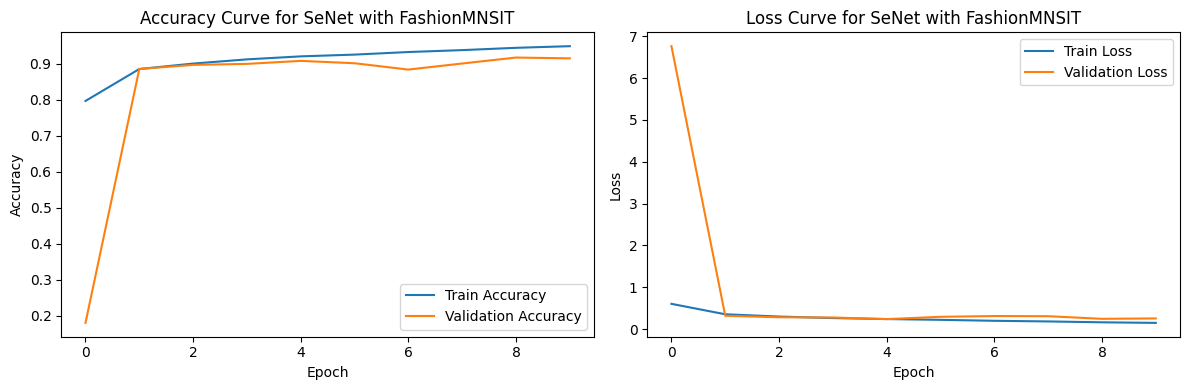

In [2]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for SeNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for SeNet with FashionMNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## VGGNET CNN with Fashion MNSIT

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the VGG-style model architecture
def VGG():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = VGG()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('vgg_fmnsit_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

import json
with open('vgg_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 180ms/step - accuracy: 0.6372 - loss: 0.9735 - val_accuracy: 0.8533 - val_loss: 0.3841
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 180ms/step - accuracy: 0.8546 - loss: 0.3902 - val_accuracy: 0.8821 - val_loss: 0.3080
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 171ms/step - accuracy: 0.8794 - loss: 0.3252 - val_accuracy: 0.9009 - val_loss: 0.2650
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 167ms/step - accuracy: 0.8959 - loss: 0.2830 - val_accuracy: 0.9116 - val_loss: 0.2414
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - accuracy: 0.9024 - loss: 0.2596 - val_accuracy: 0.9168 - val_loss: 0.2275
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 167ms/step - accuracy: 0.9110 - loss: 0.2379 - val_accuracy: 0.9213 - val_loss: 0.2137
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 168ms/step - accuracy: 0.9141 - loss: 0.2283 - val_accuracy: 0.9192 - val_loss: 0.2154
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 165ms/step - accuracy: 0.9203 - loss: 0

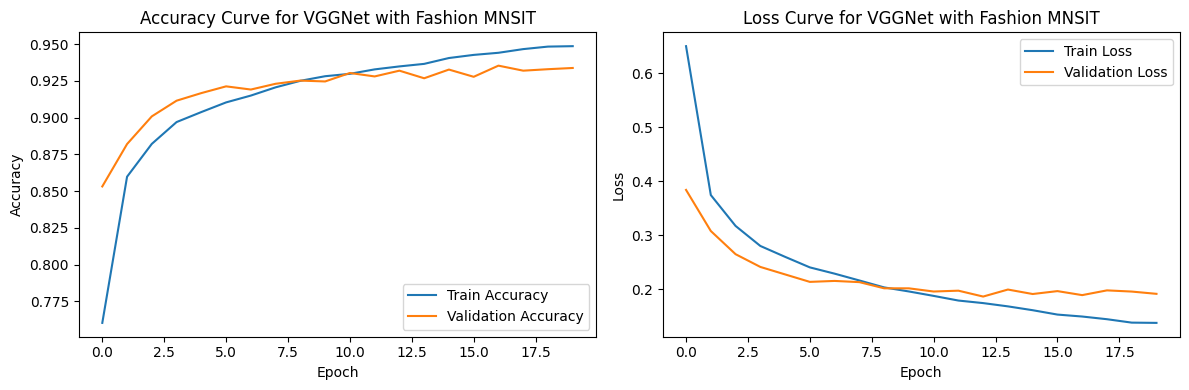

In [12]:
# Plot loss and accuracy curves
plt.figure(figsize=(12,4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for VGGNet with Fashion MNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for VGGNet with Fashion MNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Alex net with FMNSIT 

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the images to include the channel dimension (grayscale images)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the AlexNet model architecture
def AlexNet():
    model = Sequential([
        # First convolutional block
        Conv2D(96, (11, 11), activation='relu', strides=(4, 4), padding='same', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Second convolutional block
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Third convolutional block
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fourth convolutional block
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fifth convolutional block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Flattening the output to feed into fully connected layers
        Flatten(),
        
        # Fully connected layers
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # Output layer
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = AlexNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('alexnet_fmnist_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('alexnet_fashion_mnist_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 175s 461ms/step - accuracy: 0.4566 - loss: 1.3077 - val_accuracy: 0.8400 - val_loss: 0.4603
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 191s 509ms/step - accuracy: 0.8311 - loss: 0.4824 - val_accuracy: 0.8472 - val_loss: 0.4225
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 192s 512ms/step - accuracy: 0.8489 - loss: 0.4257 - val_accuracy: 0.8722 - val_loss: 0.3592
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 187s 498ms/step - accuracy: 0.8649 - loss: 0.3767 - val_accuracy: 0.8841 - val_loss: 0.3276
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 438ms/step - accuracy: 0.8734 - loss: 0.3546 - val_accuracy: 0.8742 - val_loss: 0.3572
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 186s 495ms/step - accuracy: 0.8755 - loss: 0.3360 - val_accuracy: 0.8813 - val_loss: 0.3389
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 184s 491ms/step - accuracy: 0.8811 - loss: 0.3352 - val_accuracy: 0.8820 - val_loss: 0.3256
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 182s 486ms/step - accuracy: 0.8833 -

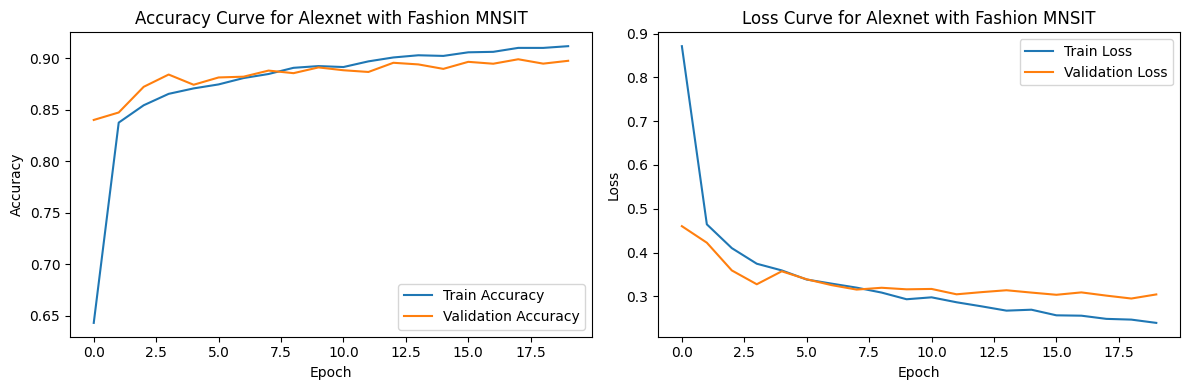

In [3]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for Alexnet with Fashion MNSIT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Alexnet with Fashion MNSIT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Code to compare loss and accuracy curves for all the CNN models with Fashion MNSIT dataset

In [4]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import json

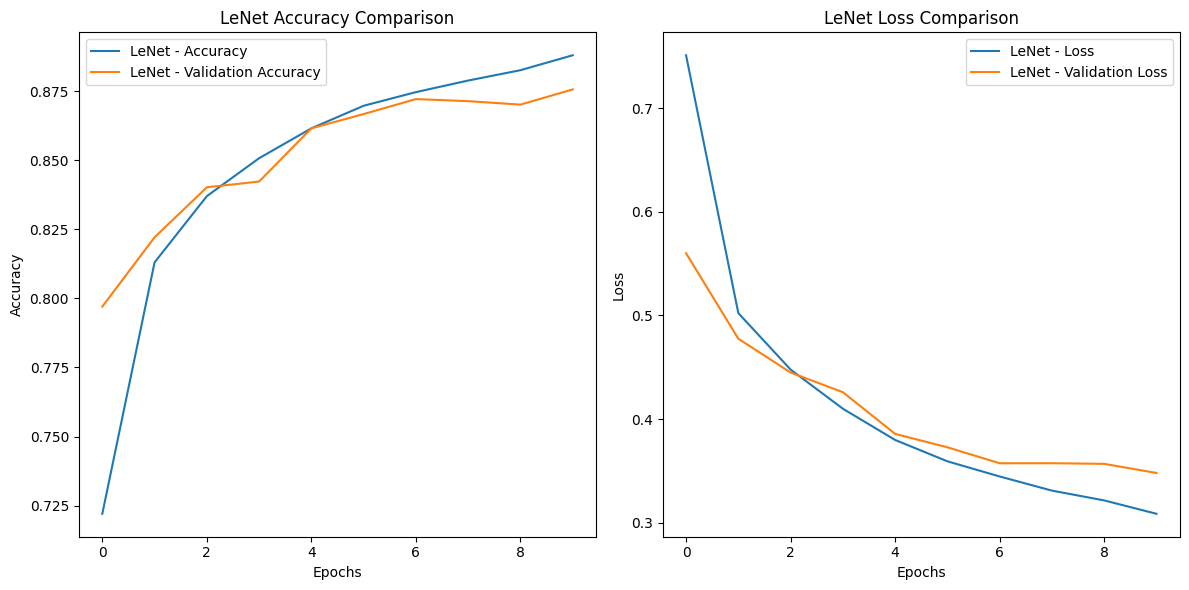

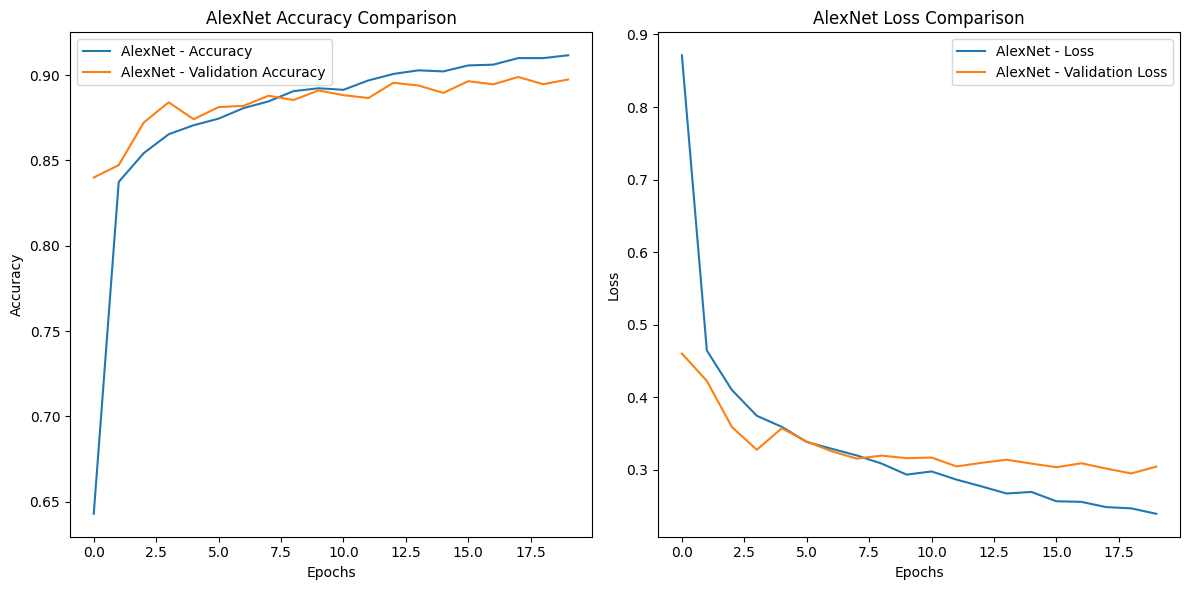

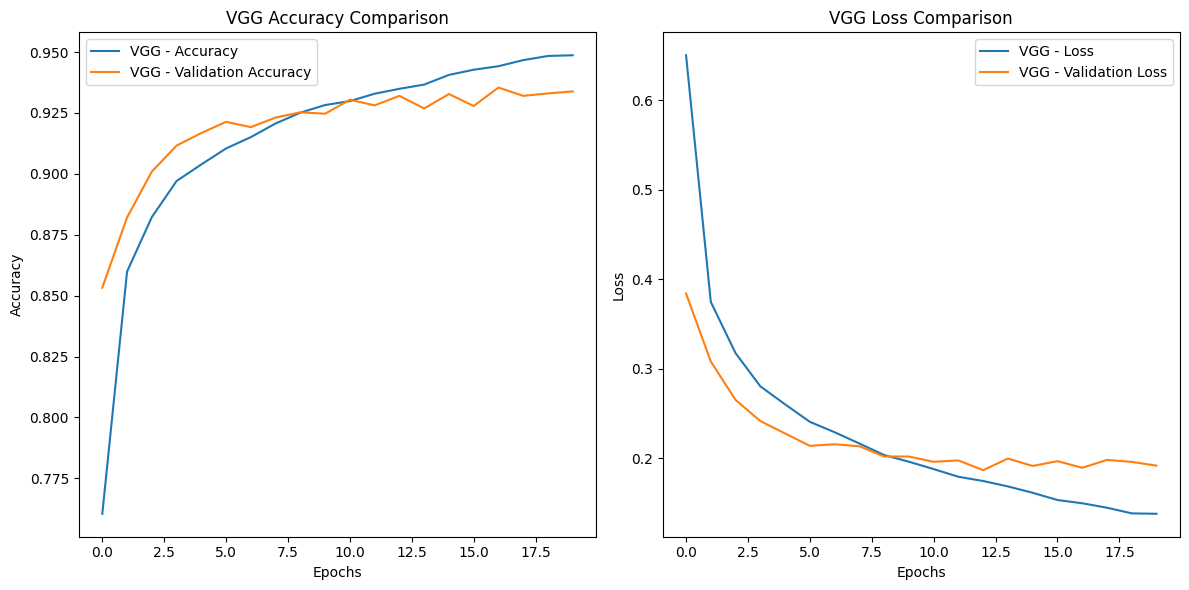

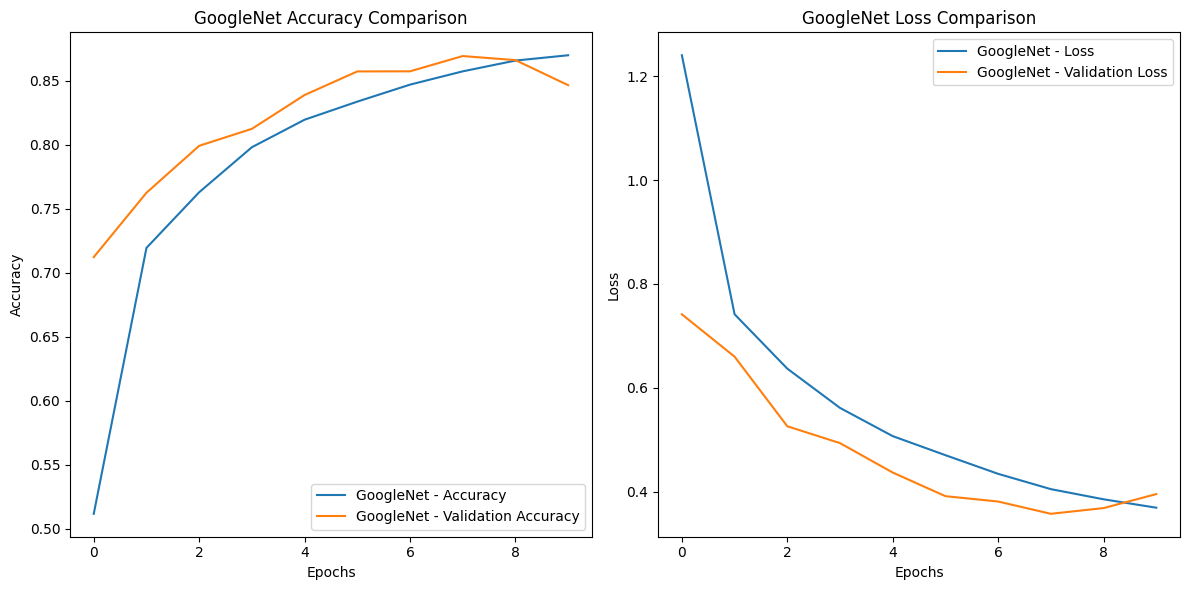

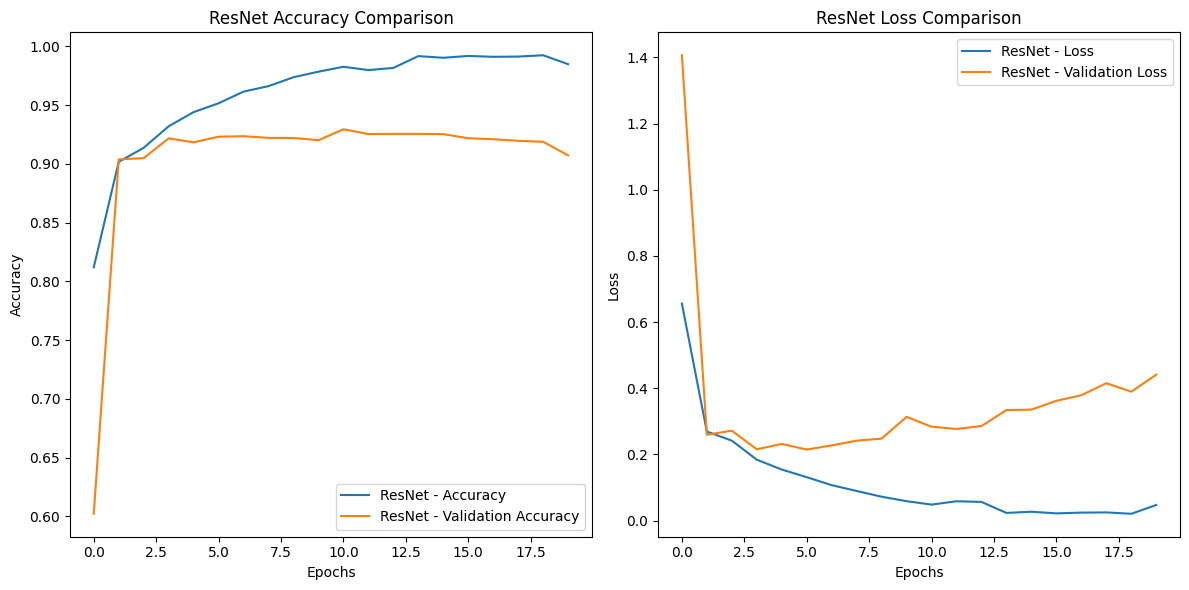

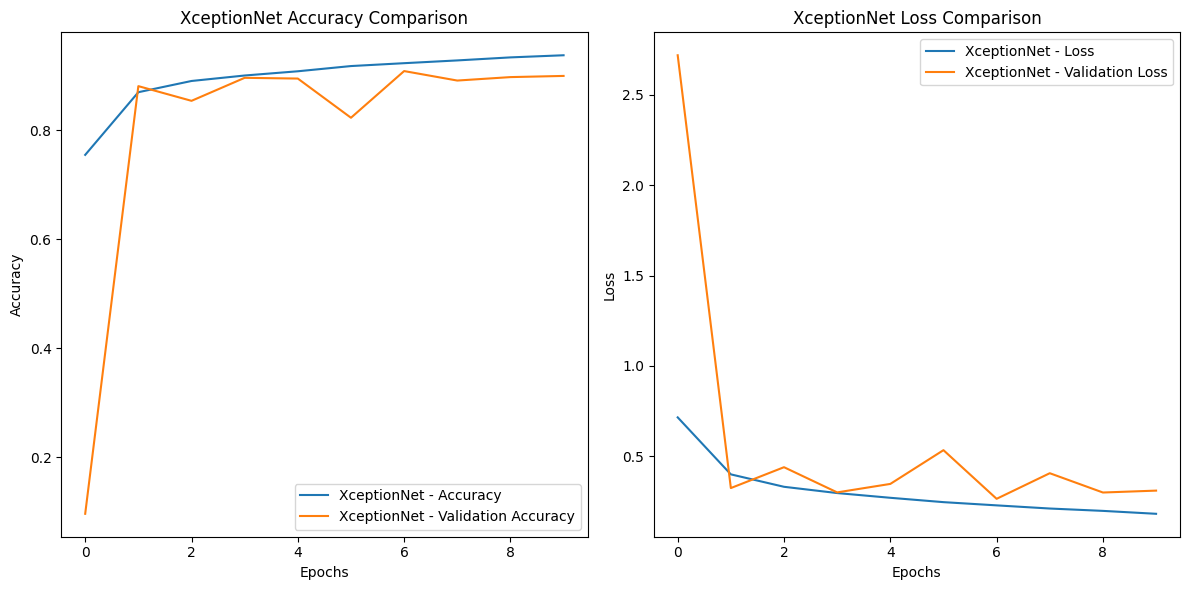

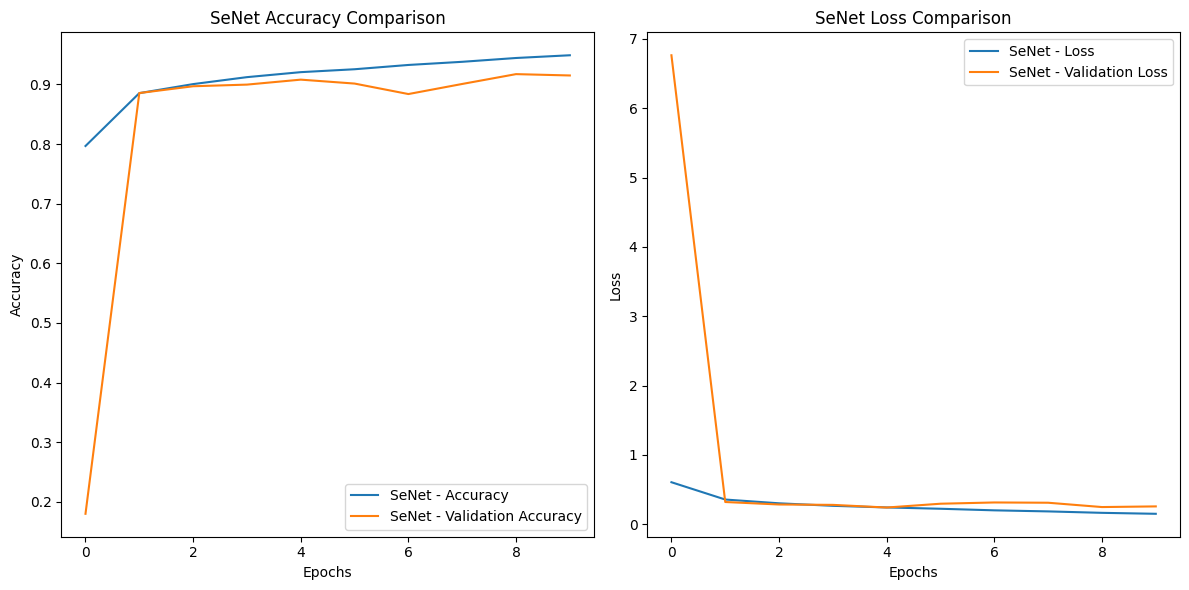

In [9]:
# Loading the saved models and results
def load_model_and_results(model_name):
    model = load_model(f'{model_name.lower()}_fmnsit_model.keras')
    with open(f'{model_name.lower()}_fashion_mnist_results.json', 'r') as f:
        results = json.load(f)
    return model, results

# Function to plot the saved models' accuracy and loss
def plot_saved_model_results(model_name):
    # Load the saved model and results
    _, results = load_model_and_results(model_name)
    
    # Get the history from the loaded results
    history = results['history']
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label=f'{model_name} - Accuracy')
    plt.plot(history['val_accuracy'], label=f'{model_name} - Validation Accuracy')
    plt.title(f'{model_name} Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label=f'{model_name} - Loss')
    plt.plot(history['val_loss'], label=f'{model_name} - Validation Loss')
    plt.title(f'{model_name} Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot results for saved models
plot_saved_model_results('LeNet')
plot_saved_model_results('AlexNet')
plot_saved_model_results('VGG')
plot_saved_model_results('GoogleNet')
plot_saved_model_results('ResNet')
plot_saved_model_results('XceptionNet')
plot_saved_model_results('SeNet')